In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Load Data

In [83]:
AAPL_data = pd.read_csv('Data/AAPL.csv')
AMZN_data = pd.read_csv('Data/AMZN.csv')
GOOG_data = pd.read_csv('Data/GOOG.csv')
META_data = pd.read_csv('Data/META.csv')
NFLX_data = pd.read_csv('Data/NFLX.csv')

#### Create PCA Index

In [84]:
# put closed data in each stock into the dataframe
pca_data = pd.DataFrame()
pca_data['s1'] = AAPL_data['Close'].values 
pca_data['s2'] = AMZN_data['Close'].values 
pca_data['s3'] = GOOG_data['Close'].values 
pca_data['s4'] = META_data['Close'].values
pca_data['s5'] = NFLX_data['Close'].values

# define a matrix
arr = np.array(pca_data)

# calculate the mean of each column
mean = np.mean(arr.T, axis=1)

#center columns by minus means
center = arr-mean

# calculate covariance matrix
cov = np.cov(center.T)

# eigen-decomposition of covariance matrix
values, vectors = np.linalg.eig(cov)

# project data
pca_index = np.dot(vectors.T, center.T)

pca_index

array([[-127.17556862, -128.52460349, -132.27107396, ...,  -65.89615568,
         -63.32394205,  -52.25429823],
       [  47.00942432,   51.34938147,   51.41545012, ...,  -16.92557458,
         -16.81064822,  -14.862377  ],
       [  -1.60462995,   -2.75000416,   -2.32649532, ...,   28.26731656,
          26.67059667,   26.75330348],
       [  -6.81260272,   -6.15942509,   -6.01475911, ...,   11.17606428,
          11.227928  ,   12.22910044],
       [   0.62090869,    1.13153913,    1.53399939, ...,   -5.67612352,
          -6.23808121,   -6.86376171]])

In [85]:
varian = pca_index.var(axis=1)
records = []
sum_varian = varian.sum()
count = 1
for i in varian:
    z = (i/sum_varian)*100
    records.append((count,i,z))
    count+=1
pca_df = pd.DataFrame(records, columns = ["Variable","Var_Capture","Var_Precentage"])
pca_df

,Variable,Var_Capture,Var_Precentage
0,1,4580.162408,69.275609
1,2,1784.954829,26.997696
2,3,199.595484,3.018910
3,4,32.410961,0.490220
4,5,14.384247,0.217564


In [86]:
competitorIndex = pd.DataFrame(pca_index[0], columns=['CompetitorIndex'])
main_df = pd.concat([AAPL_data, competitorIndex], axis=1)
main_df

,Date,Open,High,Low,Close,Adj Close,Volume,CompetitorIndex
0,2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760117,141147500,-127.175569
1,2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200,-128.524603
2,2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600,-132.271074
3,2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400,-123.168072
4,2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800,-117.638381
...,...,...,...,...,...,...,...,...
246,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900,-79.723659
247,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900,-76.849839
248,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200,-65.896156
249,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300,-63.323942


#### Extract train and test data

We will extract the last month's data as the test data and the rest as the train data

We take the date from 2022-02-24 to 2023-01-31 as the train data and make the test data from 2023-02-01 to 2023-02-23

In [87]:
train_df = main_df[(main_df['Date']>'2022-02-23') & (main_df['Date']<='2023-01-31')]
train_df

,Date,Open,High,Low,Close,Adj Close,Volume,CompetitorIndex
0,2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760117,141147500,-127.175569
1,2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200,-128.524603
2,2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600,-132.271074
3,2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400,-123.168072
4,2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800,-117.638381
...,...,...,...,...,...,...,...,...
230,2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300,-93.762731
231,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100,-91.500645
232,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70492800,-88.160584
233,2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300,-79.808806


In [88]:
test_df = main_df[(main_df['Date']>'2023-01-31')]
test_df

,Date,Open,High,Low,Close,Adj Close,Volume,CompetitorIndex
235,2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600,-89.684719
236,2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000,-98.428015
237,2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154279900,-96.661548
238,2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300,-91.930174
239,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,-94.152166
240,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-96.759915
241,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-91.676246
242,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100,-76.305307
243,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,-88.135699
244,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,-89.491542


In [89]:
def lr(df_train, df_test, colm):
    # calculate the beta values
    x_t = np.array(df_train[colm])
    y_t = np.array(df_train[["Open"]])
    b_t = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_t.T,x_t)),x_t.T),y_t)
    b_t = b_t.tolist()
    b_t = [item for sublist in b_t for item in sublist]
    
    # get the predictions
    x_test = np.array(df_test[colm])
    y_pred = np.matmul(x_test,b_t)
    
    # get the predictions for train data
    x_train = np.array(df_train[colm])
    y_pred_train = np.matmul(x_train,b_t)
    
    # calculate train errors
    train_errors = y_t - y_pred_train 
    return y_pred, train_errors

#### Evaluation

In [90]:
def evaluate(predictions, test_labels):
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#### Without feature selection

In [91]:
y_predict = []
errors = []
for i in range(len(test_df)):
    colm = ['High', 'Low', 'Close', 'Adj Close', 'Volume','CompetitorIndex']
    train_data = train_df.iloc[i:i+231]
    test_data = test_df.iloc[i:i+1]
    y, train_errors = lr(train_data,test_data, colm)
    y_predict.append(y.tolist())
    errors.append(np.mean(train_errors))

predict_df = pd.concat([pd.DataFrame(y_predict, columns=['Predict']), test_df[['Open']].reset_index(drop=True)],axis=1)
predict_df.set_index(np.array(main_df[(main_df['Date']>'2023-01-31')].Date),inplace=True)

In [92]:
evaluate(predict_df['Predict'],predict_df['Open'])

Model Performance
Average Error: 0.9617 degrees.
Accuracy = 99.36%.


99.35946579080527

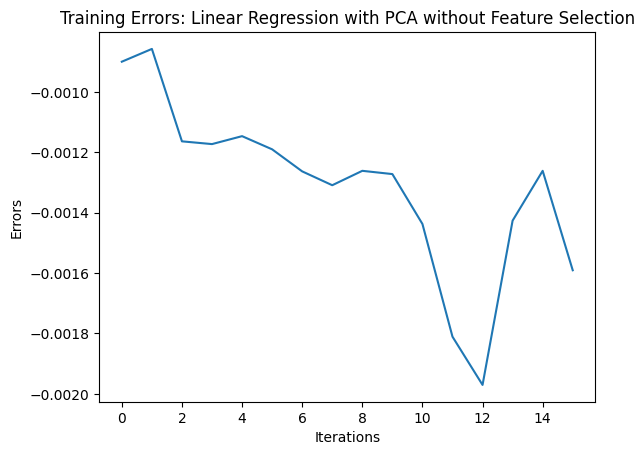

In [93]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Training Errors: Linear Regression with PCA without Feature Selection')
plt.show()

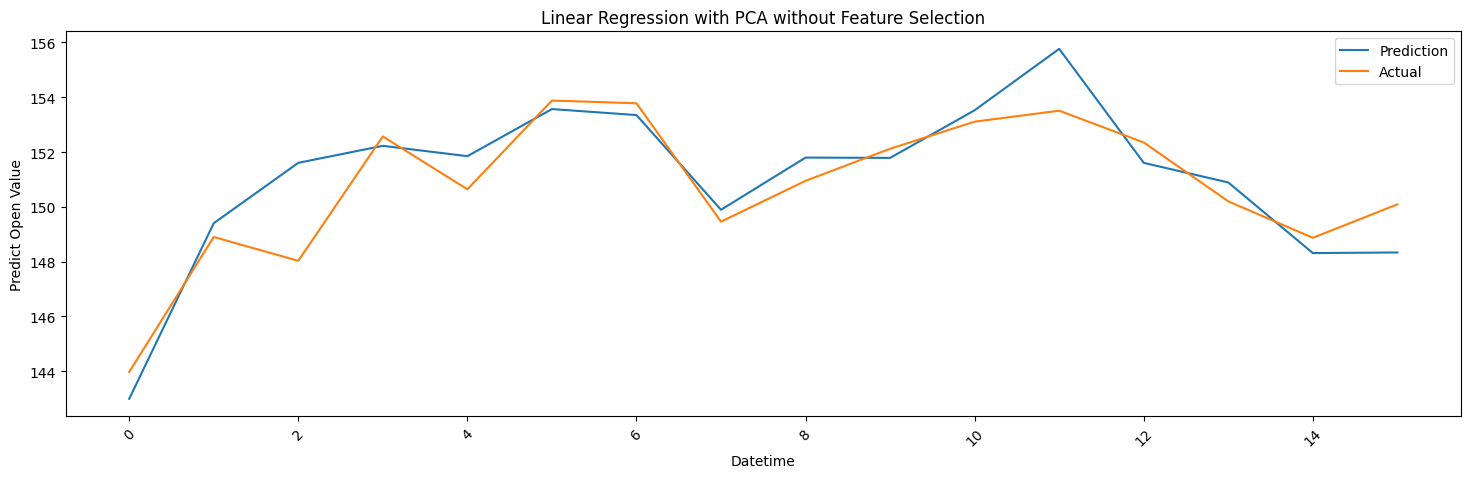

In [94]:
plt.figure(figsize=(18,5))
plt.plot(list(predict_df['Predict']), label='Prediction')
plt.xticks(rotation=45)
plt.plot(list(predict_df['Open']), label='Actual')
plt.title('Linear Regression with PCA without Feature Selection')
plt.xlabel('Datetime')
plt.ylabel('Predict Open Value')
plt.legend()
plt.show()

#### With Feature Selection ('Low', 'Close', 'CompanyIndex')

In [95]:
y_predict = []
errors = []
for i in range(len(test_df)):
    colm = ['Low', 'Close','CompetitorIndex']
    train_data = train_df.iloc[i:i+231]
    test_data = test_df.iloc[i:i+1]
    y, train_errors = lr(train_data,test_data, colm)
    y_predict.append(y.tolist())
    errors.append(np.mean(train_errors))
    
predict_df = pd.concat([pd.DataFrame(y_predict, columns=['Predict']), test_df[['Open']].reset_index(drop=True)],axis=1)
predict_df.set_index(np.array(main_df[(main_df['Date']>'2023-01-31')].Date),inplace=True)

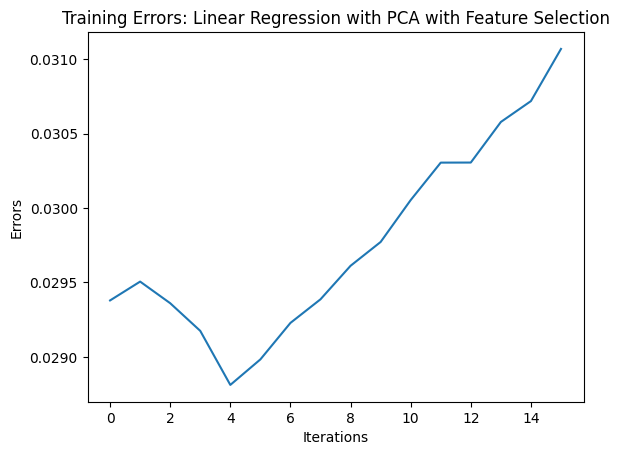

In [96]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Training Errors: Linear Regression with PCA with Feature Selection')
plt.show()

In [97]:
evaluate(predict_df['Predict'],predict_df['Open'])

Model Performance
Average Error: 0.8817 degrees.
Accuracy = 99.41%.


99.41453849945981

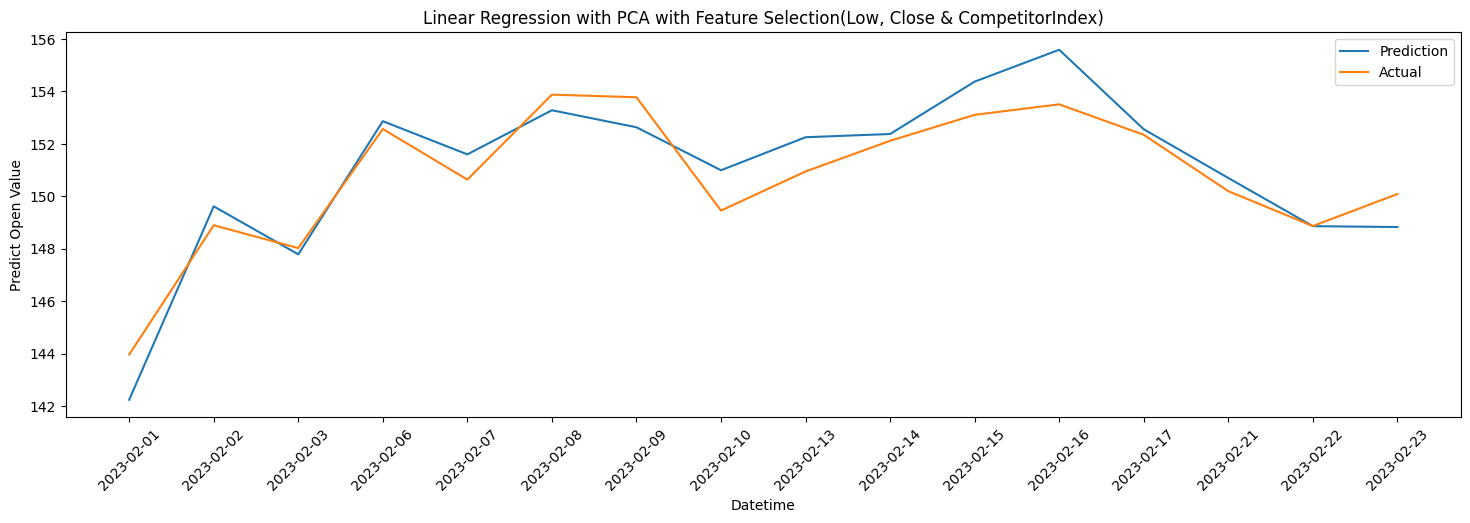

In [98]:
plt.figure(figsize=(18,5))
plt.plot(predict_df['Predict'], label='Prediction')
plt.xticks(rotation=45)
plt.plot(predict_df['Open'], label='Actual')
plt.title('Linear Regression with PCA with Feature Selection(Low, Close & CompetitorIndex)')
plt.xlabel('Datetime')
plt.ylabel('Predict Open Value')
plt.legend()
plt.show()